In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('intents.json'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
import json

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hii, Hy, Hey, Hello, Hlo, helo, Is anyone...","[Hello there. Welcome to MindCouncel ,Tell me ..."
1,morning,"[Good morning, Morning, Hii, Hi]",[Good morning! I hope you're ready to tackle t...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
76,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
77,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
78,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
79,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [23]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,"[Hello there. Welcome to MindCouncel ,Tell me ..."
1,greeting,Hii,"[Hello there. Welcome to MindCouncel ,Tell me ..."
2,greeting,Hy,"[Hello there. Welcome to MindCouncel ,Tell me ..."
3,greeting,Hey,"[Hello there. Welcome to MindCouncel ,Tell me ..."
4,greeting,Hello,"[Hello there. Welcome to MindCouncel ,Tell me ..."
...,...,...,...
238,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
239,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
240,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
241,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [24]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'mental_health',
       'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'friends', 'ask',
       'problem', 'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 243,
 'word_counts': '{"hi": 3, "hii": 2, "hy": 1, "hey": 2, "hello": 2, "hlo": 1, "helo": 1, "is": 15, "anyone": 2, "there": 5, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 2, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 39, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 3, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 31, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could"

In [26]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  307


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (243, 18)
y shape =  (243,)
num of classes =  81


In [28]:
import tensorflow
#import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model
model = Sequential()
#model=keras.models.load_model("my_model.h5")
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#model.save("my_model.h5")
model.summary()
plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 100)           30800     
                                                                 
 lstm_3 (LSTM)               (None, 18, 32)            17024     
                                                                 
 layer_normalization_5 (Lay  (None, 18, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_4 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_6 (Lay  (None, 18, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_5 (LSTM)               (None, 32)               

In [29]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)
#tfjs.converters.save_keras_model(model)

Epoch 1/50
25/25 [==============================] - 9s 14ms/step - loss: 4.9127 - accuracy: 0.0206
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 3.7735 - accuracy: 0.1276
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 3.2049 - accuracy: 0.2757
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 2.6415 - accuracy: 0.3786
Epoch 5/50
25/25 [==============================] - 0s 14ms/step - loss: 2.2275 - accuracy: 0.4486
Epoch 6/50
25/25 [==============================] - 0s 14ms/step - loss: 1.9729 - accuracy: 0.5226
Epoch 7/50
25/25 [==============================] - 0s 14ms/step - loss: 1.5429 - accuracy: 0.6255
Epoch 8/50
25/25 [==============================] - 0s 14ms/step - loss: 1.3605 - accuracy: 0.6749
Epoch 9/50
25/25 [==============================] - 0s 14ms/step - loss: 1.1478 - accuracy: 0.7449
Epoch 10/50
25/25 [==============================] - 0s 14ms/step - loss: 0.9346 - accuracy: 0.8107
Epoch 11/

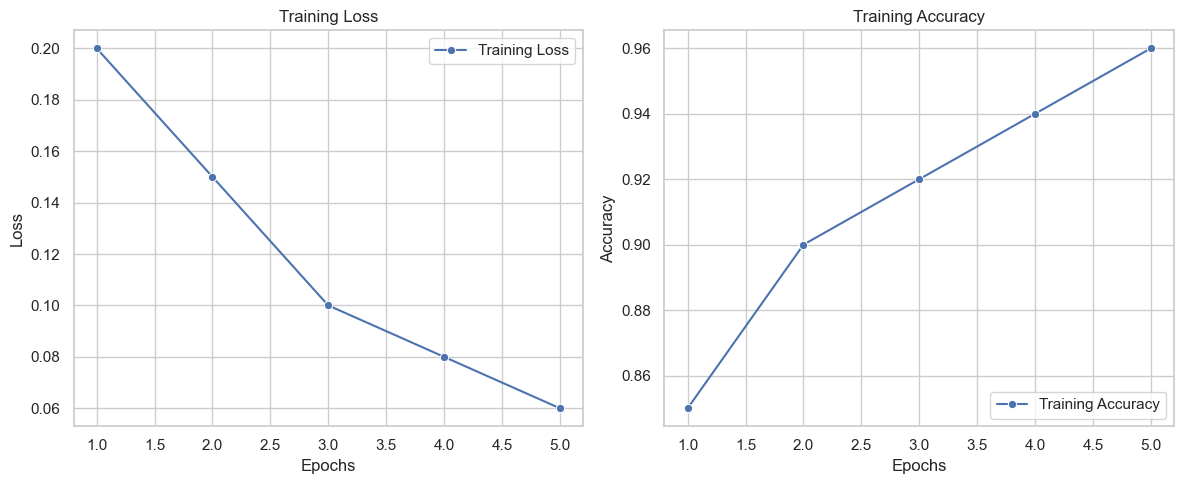

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have training history with 'loss' and 'accuracy' data
history = {
    'epoch': list(range(1, 6)),
    'loss': [0.2, 0.15, 0.1, 0.08, 0.06],
    'accuracy': [0.85, 0.90, 0.92, 0.94, 0.96]
}

# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(x='epoch', y='loss', data=history, marker='o', linestyle='-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x='epoch', y='accuracy', data=history, marker='o', linestyle='-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Customize the legend
plt.legend(loc='lower right')

# Adjust subplot layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
import re
import random

def generate_answer(pattern): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

In [13]:
generate_answer('Well... I am feeling sad!')

1/1 [==============================] - 0s 20ms/step
you: Well... I am feeling sad!
model: Why do you think you feel this way?


In [14]:
generate_answer('feeling depressed')

1/1 [==============================] - 0s 20ms/step
you: feeling depressed
model: Hello there. Glad to see you're back. What's going on in your world right now?


In [15]:
generate_answer('i am completely down today')

1/1 [==============================] - 0s 25ms/step
you: i am completely down today
model: Why do you think you feel this way?


In [16]:
generate_answer('i am completely down today')


1/1 [==============================] - 0s 19ms/step
you: i am completely down today
model: I'm here for you. Could you tell me why you're feeling this way?


In [17]:
generate_answer('i need assistance')

1/1 [==============================] - 0s 22ms/step
you: i need assistance
model: Sure. Tell me how can i assist you


In [18]:
generate_answer('i need your help')

1/1 [==============================] - 0s 24ms/step
you: i need your help
model: Sure. Tell me how can i assist you


In [19]:
generate_answer('i am feeling like need medical help')

1/1 [==============================] - 0s 24ms/step
you: i am feeling like need medical help
model: If your beliefs , thoughts , feelings or behaviours have a significant impact on your ability to function in what might be considered a normal or ordinary way, it would be important to seek help.


In [20]:
generate_answer('i feel i am mentally ill')

1/1 [==============================] - 0s 19ms/step
you: i feel i am mentally ill
model: For a diagnosis of depression, a person needs to have experienced low mood or loss of interest or pleasure in life for at least 2 weeks. Also, they will have experienced the following symptoms: feelings of sadness, hopelessness, or irritability nearly every day.


In [22]:
generate_answer('i need your help')

1/1 [==============================] - 0s 33ms/step
you: i need your help
model: Yes, sure. How can I help you?


## GUI Started


In [41]:
import tkinter as tk
from tkinter import font

# Function to handle user input and display responses
def process_user_input(event=None):
    user_input = user_input_entry.get()
    user_input_entry.delete(0, tk.END)  # Clear the input field

    generate_answer(user_input)  # Call your generate_answer function

# Create the main application window
app = tk.Tk()
app.title("Mental Health AI")

# Configure font style and size
custom_font = font.nametofont("TkDefaultFont")
custom_font.configure(size=14, weight="bold")

# Create a text box for displaying the conversation with dark theme
conversation_text = tk.Text(app, height=10, width=40, background="black", foreground="green", font=custom_font)
conversation_text.grid(row=0, column=0, columnspan=2, sticky="nsew")
conversation_text.grid_rowconfigure(0, weight=1)
conversation_text.grid_columnconfigure(0, weight=1)

# Create an entry field for user input with a red foreground
user_input_entry = tk.Entry(app, foreground="red", font=custom_font)
user_input_entry.grid(row=1, column=0, sticky="nsew")
user_input_entry.grid_rowconfigure(1, weight=1)

# Create a "Send" button with a dark background and white foreground
send_button = tk.Button(app, text="Send", command=process_user_input, background="green", foreground="white", font=custom_font)
send_button.grid(row=1, column=1, sticky="nsew")
send_button.grid_rowconfigure(1, weight=1)

# Function to update the conversation display with user and AI messages
def update_conversation(user_message, ai_message):
    conversation_text.insert(tk.END, "User: " + user_message + "\n", "user")
    conversation_text.insert(tk.END, "AI: " + ai_message + "\n", "ai")
    conversation_text.see(tk.END)  # Scroll to the latest message

    # Apply the appropriate tags for coloring
    conversation_text.tag_configure("user", foreground="red")
    conversation_text.tag_configure("ai", foreground="gree")

# Function to generate AI responses
def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    user_message = pattern
    ai_message = random.choice(responses)

    update_conversation(user_message, ai_message)

# Bind the "Enter" key to the user input entry field
user_input_entry.bind("<Return>", process_user_input)

# Allow window resizing
app.rowconfigure(0, weight=1)
app.columnconfigure(0, weight=1)

# Start the application
app.mainloop()


1/1 [==============================] - 0s 27ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 18ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 24ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 18ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 15ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 16ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 

1/1 [==============================] - 0s 20ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 9, in process_user_input
    generate_answer(user_input)  # Call your generate_answer function
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 65, in generate_answer
    update_conversation(user_message, ai_message)
  File "C:\Users\swain\AppData\Local\Temp\ipykernel_3172\1009280953.py", line 43, in update_conversation
    conversation_text.tag_configure("ai", foreground="gree")
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 3898, in tag_configure
    return self._configure(('tag', 'configure', tagName), cnf, kw)
  File "C:\Users\swain\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: unknown color 